# import the libraries

In [1]:
import pandas as pd, numpy as np
import re

# load our dataset

In [2]:
reviews0 = pd.read_csv("Zomato_reviews.csv")

In [3]:
reviews0.head()

,rating,review_text
0,1.0,"Their service is worst, pricing in menu is dif..."
1,5.0,really appreciate their quality and timing . I...
2,4.0,"Went there on a Friday night, the place was su..."
3,4.0,A very decent place serving good food.\r\nOrde...
4,5.0,One of the BEST places for steaks in the city....


# Sense-check the data frame

In [4]:
reviews0.shape

(27762, 2)

In [5]:
reviews0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27762 entries, 0 to 27761
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rating       27762 non-null  float64
 1   review_text  27748 non-null  object 
dtypes: float64(1), object(1)
memory usage: 433.9+ KB


In [6]:
reviews0.describe(include="all")

,rating,review_text
count,27762.000000,27748
unique,NaN,10548
top,NaN,good
freq,NaN,278
mean,3.665784,NaN
std,1.284573,NaN
min,1.000000,NaN
25%,3.000000,NaN
50%,4.000000,NaN
75%,5.000000,NaN


# Determine if there are any missing values in the data.

In [7]:
reviews0.isnull().sum()

rating          0
review_text    14
dtype: int64

14 rows are missing the review text - need to get rid of these records

In [8]:
# drop the missing value
reviews1 = reviews0[~reviews0.review_text.isnull()].copy()
reviews1.reset_index(inplace=True, drop=True)

In [9]:
reviews0.shape

(27762, 2)

In [10]:
reviews1.shape

(27748, 2)

# Retain the review and summary columns.

#### Converting to list for easy manipulation

In [11]:
reviews_list = reviews1.review_text.values

In [12]:
len(reviews_list)

27748

# Change to lowercase, Drop duplicates, remove punctuation, Tokenize and create a word cloud in each of the columns respectively.

Normalizing case

In [13]:
reviews_lower = [txt.lower() for txt in reviews_list]

In [14]:
reviews_lower[2:4]

['went there on a friday night, the place was surprisingly empty. interesting menu which is almost fully made of dosas. i had bullseye dosa and cheese masala dosa. the bullseye dosa was really good, with the egg perfectly cooked to a half boiled state. the masala in the cheese masala was good, but the cheese was a bit too chewy for my liking. the chutney was good, the sambar was average. the dishes are reasonably priced.',
 'a very decent place serving good food.\r\nordered chilli fish, chicken & pork sizzler.\r\neverything tasted good but pork could have been slightly better cooked.\r\ntried 2 beverages, both were very sweet.']

Remove extra line breaks

In [15]:
reviews_lower = [" ".join(txt.split()) for txt in reviews_lower]

In [16]:
reviews_lower[2:4]

['went there on a friday night, the place was surprisingly empty. interesting menu which is almost fully made of dosas. i had bullseye dosa and cheese masala dosa. the bullseye dosa was really good, with the egg perfectly cooked to a half boiled state. the masala in the cheese masala was good, but the cheese was a bit too chewy for my liking. the chutney was good, the sambar was average. the dishes are reasonably priced.',
 'a very decent place serving good food. ordered chilli fish, chicken & pork sizzler. everything tasted good but pork could have been slightly better cooked. tried 2 beverages, both were very sweet.']

#### Tokenize

In [17]:
from nltk.tokenize import word_tokenize

In [18]:
print(word_tokenize(reviews_lower[0]))

['their', 'service', 'is', 'worst', ',', 'pricing', 'in', 'menu', 'is', 'different', 'from', 'bill', '.', 'they', 'can', 'give', 'you', 'a', 'bill', 'with', 'increased', 'pricing', '.', 'even', 'for', 'serving', 'water', ',', 'menu', ',', 'order', 'you', 'need', 'to', 'call', 'them', '3-4', 'times', 'even', 'on', 'a', 'non', 'busy', 'day', '.']


In [19]:
reviews_tokens = [word_tokenize(sent) for sent in reviews_lower]
print(reviews_tokens[0])

['their', 'service', 'is', 'worst', ',', 'pricing', 'in', 'menu', 'is', 'different', 'from', 'bill', '.', 'they', 'can', 'give', 'you', 'a', 'bill', 'with', 'increased', 'pricing', '.', 'even', 'for', 'serving', 'water', ',', 'menu', ',', 'order', 'you', 'need', 'to', 'call', 'them', '3-4', 'times', 'even', 'on', 'a', 'non', 'busy', 'day', '.']


### Remove stop words and punctuations

In [20]:
from nltk.corpus import stopwords
from string import punctuation

In [21]:
stop_nltk = stopwords.words("english")
stop_punct = list(punctuation)

In [22]:
print(stop_nltk)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [23]:
stop_nltk.remove("no")
stop_nltk.remove("not")
stop_nltk.remove("don")
stop_nltk.remove("won")

In [24]:
"no" in stop_nltk

False

In [25]:
stop_final = stop_nltk + stop_punct + ["...", "``","''", "====", "must"]

In [26]:
def del_stop(sent):
    return [term for term in sent if term not in stop_final]

In [27]:
del_stop(reviews_tokens[1])

['really',
 'appreciate',
 'quality',
 'timing',
 'tried',
 'thattil',
 'kutti',
 'dosa',
 "'ve",
 'addicted',
 'dosa',
 'really',
 'chutney',
 'really',
 'good',
 'money',
 'worth',
 'much',
 'better',
 'thattukada',
 'try']

In [28]:
reviews_clean = [del_stop(sent) for sent in reviews_tokens]

In [29]:
reviews_clean = [" ".join(sent) for sent in reviews_clean]
reviews_clean[:2]

['service worst pricing menu different bill give bill increased pricing even serving water menu order need call 3-4 times even non busy day',
 "really appreciate quality timing tried thattil kutti dosa 've addicted dosa really chutney really good money worth much better thattukada try"]

# Identify the 15 most common words and polarity.

In [30]:
data = pd.DataFrame(reviews_clean)
data.columns = ['reviews']

In [31]:
data.head()

,reviews
0,service worst pricing menu different bill give...
1,really appreciate quality timing tried thattil...
2,went friday night place surprisingly empty int...
3,decent place serving good food ordered chilli ...
4,one best places steaks city tried beef steak c...


In [32]:
from collections import Counter

In [33]:
count = Counter(word for line in data['reviews']
                         for word in line.split())

print(count.most_common(15))

[('place', 20591), ('food', 20327), ('good', 20098), ('not', 10173), ('chicken', 9474), ('service', 8290), ('ordered', 6615), ('ambience', 6268), ('great', 6030), ("'s", 5623), ('taste', 5617), ('one', 5353), ('really', 5057), ('try', 4988), ('also', 4949)]


In [34]:
#polarity

In [35]:
from textblob import TextBlob

In [36]:
data['polarity'] =data['reviews'].apply(lambda x: TextBlob(str(x).lower()).sentiment.polarity)
data['subjectivity'] =data['reviews'].apply(lambda x: TextBlob(str(x).lower()).sentiment.subjectivity)


In [37]:
data.head()

,reviews,polarity,subjectivity
0,service worst pricing menu different bill give...,-0.300000,0.633333
1,really appreciate quality timing tried thattil...,0.250000,0.366667
2,went friday night place surprisingly empty int...,0.375926,0.551852
3,decent place serving good food ordered chilli ...,0.302778,0.661111
4,one best places steaks city tried beef steak c...,0.500000,0.380000


# Identify and print the top 20 positive and negative reviews and summaries respectively

# top 20 posiive reviews and summary

In [38]:
# Arranging the dataframe by positive column in descending order to find the best postive sentence.
pos_reviews=data.sort_values(by='polarity', ascending=False)

In [39]:
pos_reviews.head(20)
# printing the first 20 rows

,reviews,polarity,subjectivity
27034,two days two wonderful meals,1.0,1.00
25568,awesome food,1.0,1.00
21735,best coffee ever would say best everything hom...,1.0,0.30
25573,awesome food,1.0,1.00
21740,best coffee ever would say best everything hom...,1.0,0.30
2508,delicious biryani best biryani lovers,1.0,0.65
20163,perfect timing thank u,1.0,1.00
17074,awesome food,1.0,1.00
21745,best coffee ever would say best everything hom...,1.0,0.30
17079,awesome food,1.0,1.00


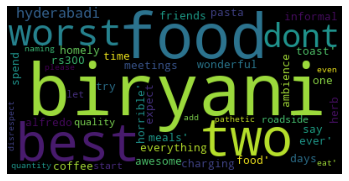

In [40]:
#summary

import matplotlib.pyplot as plt
from wordcloud import WordCloud

text_1 = pos_reviews['reviews'].values

wordcloud = WordCloud().generate(str(text_1))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# top 20 negatives reviews and summary

In [41]:
# Arranging the dataframe by negative column in ascending order to find the best postive sentence.
neg_reviews=data.sort_values(by='polarity', ascending=True)

In [42]:
neg_reviews.head(20)

,reviews,polarity,subjectivity
19782,worst delivery service,-1.0,1.0
12341,no onions worst,-1.0,1.0
12342,worst food need refund,-1.0,1.0
4072,rice not cooked worst food,-1.0,1.0
12346,no onions worst,-1.0,1.0
27022,one worst food ever eaten no taste no salt way...,-1.0,1.0
12347,worst food need refund,-1.0,1.0
27027,one worst food ever eaten no taste no salt way...,-1.0,1.0
18281,worst service ever resturant..,-1.0,1.0
17592,want talk restaurant owner pathetic employees ...,-1.0,1.0


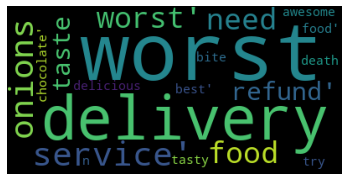

In [43]:
text_2 = neg_reviews['reviews'].values
wordcloud = WordCloud().generate(str(text_2))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()